In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [64]:
df = pd.DataFrame([[1,2,3],[4,5,6],[0,9,0]],columns = ['A','B','C'])

In [65]:
df

,A,B,C
0,1,2,3
1,4,5,6
2,0,9,0


In [66]:
df['A'].isna().sum() > 0

False

In [67]:
df['A'] = None

In [62]:
#df.drop(df.columns[df.isna().sum()>0],axis = 1,inplace = True)

In [100]:
df

,A,B,C
0,None,2,3
1,None,5,6
2,None,9,0


In [143]:
notNull_values = df.notnull().sum(axis = 1) 

In [114]:
df = pd.DataFrame({'a':[1,0,0,1,3], 'b':[0,0,1,0,1], 'c':[0,0,0,0,0]})
df.apply( lambda s : s.value_counts().get(key=0,default=0), axis=1)

0    2
1    3
2    2
3    2
4    1
dtype: int64

In [142]:
df = pd.DataFrame({'a':[1,0,0,1,3,None], 'b':[0,0,1,0,1,6], 'c':[0,0,0,0,0,2]})
zero_values = df.apply( lambda s : s.value_counts().get(key=0,default=0), axis=1)

In [149]:
df['flag'] = ((notNull_values - zero_values)/(len(df.columns)) * 100) > 50 

In [150]:
df

,a,b,c,flag
0,1.0,0,0,False
1,0.0,0,0,False
2,0.0,1,0,False
3,1.0,0,0,False
4,3.0,1,0,False
5,NaN,6,2,False


In [162]:
((df.isin([0]).sum(axis=1) + df.isnull().sum(axis=1))/df.shape[1]) * 100 < 50

0    False
1    False
2    False
3    False
4    False
5    False
dtype: bool

In [76]:
ls = ['A']
ls[df.isna().sum()>0]


TypeError: ignored

In [97]:
ddf = pd.DataFrame(columns = ['B','A'])

In [98]:
ddf.columns[df[df.columns[0:2]].isna().sum()>0]

Index(['B'], dtype='object')

In [93]:
df.isna().sum()>0

A     True
B    False
C    False
dtype: bool

In [87]:
df.columns[df.isna().sum()>0]

Index(['A'], dtype='object')

In [ ]:
walmart_data = pd.read_csv("walmart_data.csv")

In [ ]:
walmart_data.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871


In [ ]:
walmart_data.shape

(550068, 10)

In [ ]:
walmart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
walmart_data.isnull().sum()/len(walmart_data) 

User_ID                       0.0
Product_ID                    0.0
Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category              0.0
Purchase                      0.0
dtype: float64

In [ ]:
#One row in purchase is null, we can delete that.

In [ ]:
walmart_data.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [ ]:
walmart_data.describe(include = object)


,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


In [ ]:
#check data types and do the transformations - only purchase and year should be numeric

In [ ]:
walmart_data['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [ ]:
#describe function
#mean median inference
#outliers - boxplot on Purchase , yrs
#value counts & plot

In [ ]:
for i in walmart_data.columns:
 print(i,':',walmart_data[i].nunique())

unique_count_ls = [(col,walmart_data[col].nunique()) for col in walmart_data.columns]

User_ID : 5891
Product_ID : 3631
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category : 20
Purchase : 18105


In [ ]:
print(walmart_data['Gender'].value_counts(normalize = True) * 100)


M    75.310507
F    24.689493
Name: Gender, dtype: float64


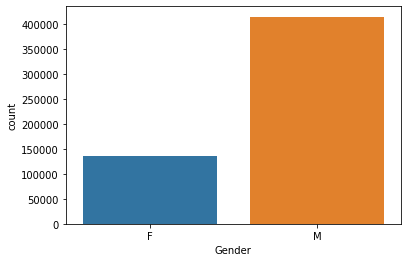

In [ ]:
sns.countplot(x='Gender', data = walmart_data)

In [ ]:
print(walmart_data['Marital_Status'].value_counts(normalize = True) * 100)


0    59.034701
1    40.965299
Name: Marital_Status, dtype: float64


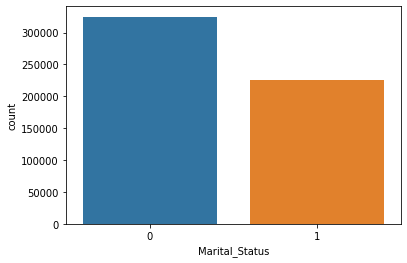

In [ ]:
sns.countplot(x='Marital_Status', data = walmart_data)

In [ ]:
print(walmart_data['Age'].value_counts(normalize = True) * 100)


26-35    39.919974
36-45    19.999891
18-25    18.117760
46-50     8.308246
51-55     6.999316
55+       3.909335
0-17      2.745479
Name: Age, dtype: float64


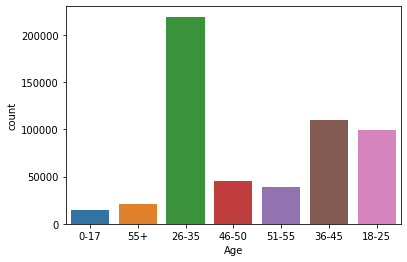

In [ ]:
sns.countplot(x='Age', data = walmart_data)

In [ ]:
print(walmart_data['Occupation'].value_counts(normalize = True) * 100)


4     13.145284
0     12.659889
7     10.750125
1      8.621843
17     7.279645
20     6.101427
12     5.668208
14     4.964659
2      4.833584
16     4.612339
6      3.700452
3      3.208694
10     2.350618
5      2.213726
15     2.211545
11     2.106285
19     1.538173
13     1.404917
18     1.203851
9      1.143677
8      0.281056
Name: Occupation, dtype: float64


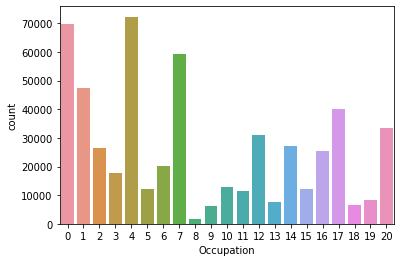

In [ ]:
sns.countplot(x='Occupation', data = walmart_data)

In [ ]:
print(walmart_data['City_Category'].value_counts(normalize = True) * 100)


B    42.026259
C    31.118880
A    26.854862
Name: City_Category, dtype: float64


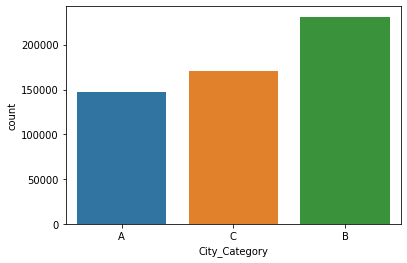

In [ ]:
sns.countplot(x='City_Category', data = walmart_data)

In [ ]:
print(walmart_data['Product_Category'].value_counts(normalize = True) * 100)


5     27.438971
1     25.520118
8     20.711076
11     4.415272
2      4.338373
6      3.720631
3      3.674637
4      2.136645
16     1.786688
15     1.143495
13     1.008784
10     0.931703
12     0.717548
7      0.676462
18     0.568112
20     0.463579
19     0.291419
14     0.276875
17     0.105078
9      0.074536
Name: Product_Category, dtype: float64


In [ ]:
#print(walmart_data['Purchase'].value_counts(normalize = True) * 100)


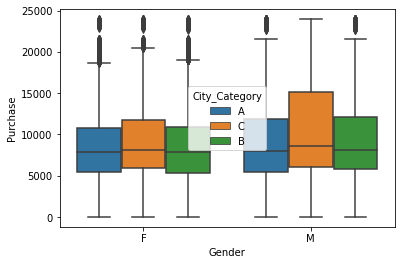

In [ ]:
sns.boxplot(x = "Gender",y = 'Purchase',hue = 'City_Category',data = walmart_data)

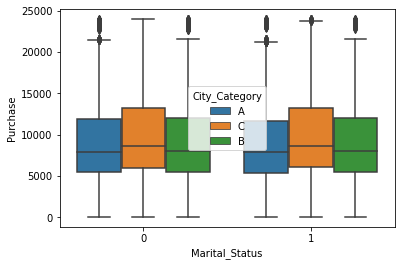

In [ ]:
sns.boxplot(x = "Marital_Status",y = 'Purchase',hue = 'City_Category',data = walmart_data)

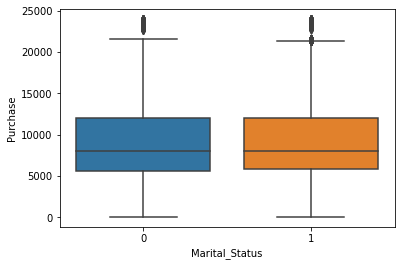

In [ ]:
sns.boxplot(x = "Marital_Status", y = "Purchase", data = walmart_data)

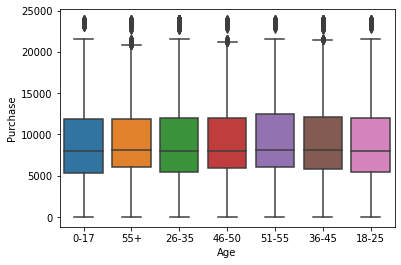

In [ ]:
sns.boxplot(x = "Age", y = "Purchase", data = walmart_data)

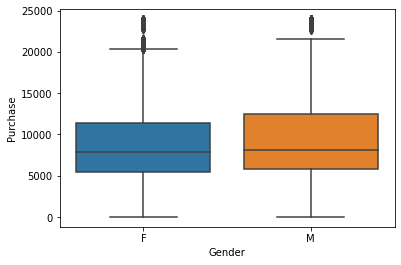

In [ ]:
sns.boxplot(x = "Gender", y = "Purchase", data = walmart_data)


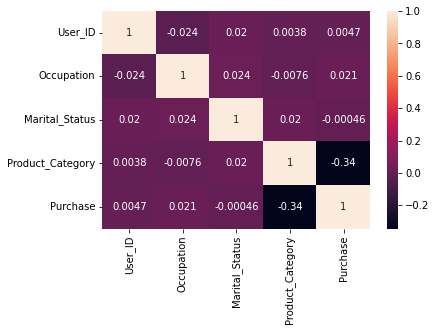

In [ ]:
sns.heatmap(walmart_data.corr(),annot=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


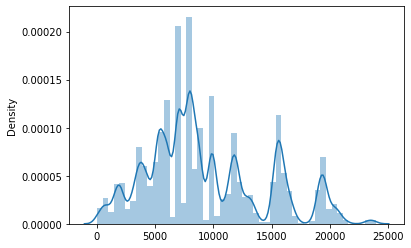

In [ ]:
sns.distplot(x = walmart_data['Purchase'])


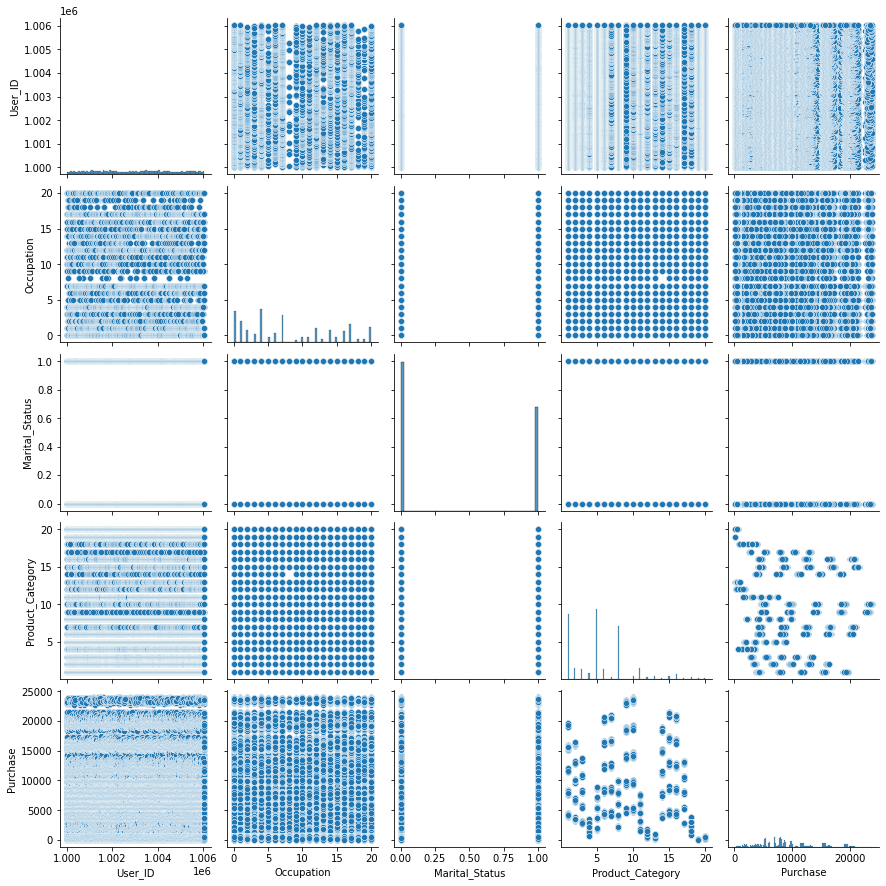

In [ ]:
# Pairplot
sns.pairplot(walmart_data)

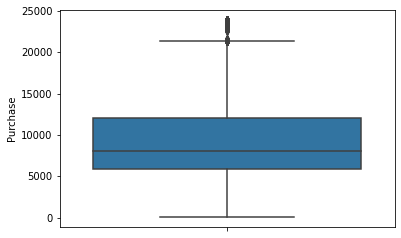

In [ ]:
sns.boxplot(y = "Purchase", data = walmart_data)


In [ ]:
walmart_data['Gender'].unique()

array(['F', 'M'], dtype=object)

In [ ]:
q25,q75 = walmart_data['Purchase'].quantile(0.25),walmart_data['Purchase'].quantile(0.75)
iqr = q75 - q25
lcl = q25 - (2.0 * iqr)
ucl = q75 + (2.0 * iqr)

In [ ]:
print(q25,q75,iqr,lcl,ucl)

5823.0 12054.0 6231.0 -6639.0 24516.0


In [ ]:
purchase_outlier_df = pd.DataFrame(walmart_data.loc[(walmart_data['Purchase'] < lcl) | (walmart_data['Purchase'] > ucl)])

In [ ]:
purchase_outlier_df.shape

(0, 10)

In [ ]:
male_df = pd.DataFrame(walmart_data.loc[walmart_data['Gender'] == 'M',['Gender','Purchase']])
male_df.reset_index(inplace = True,drop = True)


In [ ]:
female_df = pd.DataFrame(walmart_data.loc[walmart_data['Gender'] == 'F',['Gender','Purchase']])
female_df.reset_index(inplace = True,drop = True)


In [ ]:
male_df #121

,Gender,Purchase
0,M,7969
1,M,15227
2,M,19215
3,M,15854
4,M,15686
...,...,...
414254,M,61
414255,M,121
414256,M,494
414257,M,473


In [ ]:
female_df #368 

,Gender,Purchase
0,F,8370
1,F,15200
2,F,1422
3,F,1057
4,F,5378
...,...,...
135804,F,599
135805,F,371
135806,F,137
135807,F,365


In [ ]:
male_initial_mean = male_df['Purchase'].mean()
female_initial_mean = female_df['Purchase'].mean()
print(male_initial_mean,female_initial_mean)

9437.526040472265 8734.565765155476


In [ ]:
bootstrapped_means_survey_2 = []
for reps in range(121):
  bootstrapped_samples = np.random.choice(male_df['Purchase'],size = male_df.shape[0])
  bootstrapped_mean = np.mean(bootstrapped_samples)
  bootstrapped_means_survey_2.append(bootstrapped_mean)

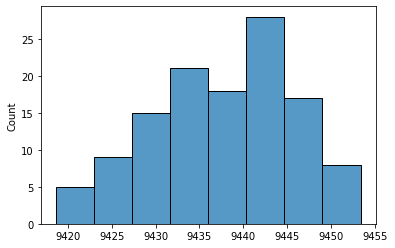

In [ ]:
sns.histplot(bootstrapped_means_survey_2)

In [ ]:
np.percentile(bootstrapped_means_survey_2,97.5)

9449.791507245467

In [ ]:
np.percentile(bootstrapped_means_survey_2,2.5)


9421.991589802516

In [ ]:
pop_mean = np.mean(bootstrapped_means_survey_2)

In [ ]:
pop_std = np.std(bootstrapped_means_survey_2)
print(pop_std)

7.843127496771264


In [ ]:
male_df['Purchase'].std()

5092.18620977797

In [ ]:
np.std(male_df['Purchase'])/np.sqrt(414259)


7.911662926429213

In [ ]:
# As per CLT mean of population is approximately equal to sample mean

In [ ]:
male_df_purchase_mean = np.mean(male_df['Purchase'])
print(male_df_purchase_mean)

9437.526040472265


In [ ]:
female_df_purchase_mean = np.mean(female_df['Purchase'])
print(female_df_purchase_mean)

8734.565765155476


In [ ]:
# Amount spent per transaction of all the female customers population will be lesser than amount spent per transaction of all the 50 million male customers population

In [ ]:
# Confidence Interval 

In [ ]:
norm.ppf(0.975)

1.959963984540054

In [ ]:
low_CI = male_df_purchase_mean - (np.abs(norm.ppf(0.025)) * (male_df['Purchase'].std()/np.sqrt(male_df.shape[0])))

In [ ]:
high_CI = male_df_purchase_mean + (np.abs(norm.ppf(0.975)) * (male_df['Purchase'].std()/np.sqrt(male_df.shape[0])))


In [ ]:
print(low_CI,high_CI)


9422.01944736257 9453.032633581959


In [ ]:
# Population mean should lie between CI (9422.01,9453.03)

In [ ]:
low_CI = female_df_purchase_mean - (np.abs(norm.ppf(0.025)) * (female_df['Purchase'].std()/np.sqrt(female_df.shape[0])))
high_CI = female_df_purchase_mean + (np.abs(norm.ppf(0.975)) * (female_df['Purchase'].std()/np.sqrt(female_df.shape[0])))
print(low_CI,high_CI)


8709.21154714068 8759.919983170272


In [ ]:
#Using the sample of female customers you will calculate the interval within which the average spending of 50 million male and female customers may lie.

In [ ]:
low_CI = female_df_purchase_mean - (np.abs(norm.ppf(0.025)) * (walmart_data['Purchase'].std()/np.sqrt(walmart_data.shape[0])))
high_CI = female_df_purchase_mean + (np.abs(norm.ppf(0.975)) * (walmart_data['Purchase'].std()/np.sqrt(walmart_data.shape[0])))
print(low_CI,high_CI)


8721.291553663226 8747.839976647725


In [ ]:
walmart_data['Purchase'].mean()

9263.968712959126

In [ ]:
#Sampling on data of male customers for size = 10000

In [ ]:
num_samples = 10000
sample1_df = male_df['Purchase'].sample(num_samples)

In [ ]:
samples_mean_ls = []
size = 100000
for reps in range(10000):
  samples = np.random.choice(male_df['Purchase'],size = size)
  sample_mean = np.mean(samples)
  samples_mean_ls.append(sample_mean)


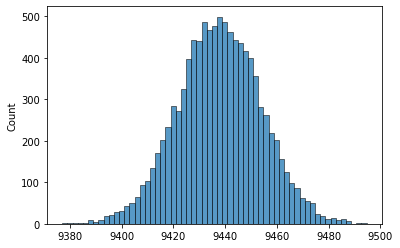

In [ ]:
sns.histplot(samples_mean_ls)

In [ ]:
pop_mean = np.mean(samples_mean_ls)
pop_std = np.std(samples_mean_ls)
print(pop_mean,pop_std)

9437.60431425 16.09874140499774


In [ ]:
low_CI = samples_mean_ls[0] - (np.abs(norm.ppf(0.025)) * (male_df['Purchase'].std()/np.sqrt(size)))
high_CI = samples_mean_ls[0] + (np.abs(norm.ppf(0.975)) * (male_df['Purchase'].std()/np.sqrt(size)))

print(low_CI,high_CI)

9396.1113128361 9459.233547163902


In [ ]:
low_CI = samples_mean_ls[1] - (np.abs(norm.ppf(0.025)) * (male_df['Purchase'].std()/np.sqrt(size)))
high_CI = samples_mean_ls[1] + (np.abs(norm.ppf(0.975)) * (male_df['Purchase'].std()/np.sqrt(size)))

print(low_CI,high_CI)

9417.623642836099 9480.745877163901


In [ ]:
low_CI = samples_mean_ls[0] - (np.abs(norm.ppf(0.05)) * (male_df['Purchase'].std()/np.sqrt(size)))
high_CI = samples_mean_ls[0] + (np.abs(norm.ppf(0.95)) * (male_df['Purchase'].std()/np.sqrt(size)))

print(low_CI,high_CI)

9401.185505522219 9454.159354477782


In [ ]:
low_CI = samples_mean_ls[0] - (np.abs(norm.ppf(0.005)) * (male_df['Purchase'].std()/np.sqrt(size)))
high_CI = samples_mean_ls[0] + (np.abs(norm.ppf(0.995)) * (male_df['Purchase'].std()/np.sqrt(size)))

print(low_CI,high_CI)

9386.194091068892 9469.15076893111


In [ ]:
low_CI = samples_mean_ls[0] - (np.abs(norm.ppf(0.175)) * (male_df['Purchase'].std()/np.sqrt(size)))
high_CI = samples_mean_ls[0] + (np.abs(norm.ppf(0.825)) * (male_df['Purchase'].std()/np.sqrt(size)))

print(low_CI,high_CI)

9412.622825849943 9442.722034150058


In [ ]:
# females sampling

In [ ]:
samples_mean_ls = []
size = 100000
for reps in range(10000):
  samples = np.random.choice(female_df['Purchase'],size = size)
  sample_mean = np.mean(samples)
  samples_mean_ls.append(sample_mean)


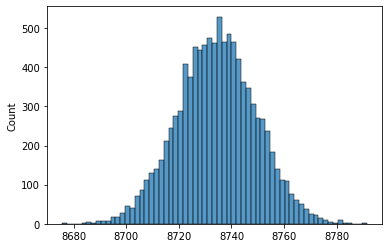

In [ ]:
sns.histplot(samples_mean_ls)

In [ ]:
pop_mean = np.mean(samples_mean_ls)
pop_std = np.std(samples_mean_ls)
print(pop_mean,pop_std)

8734.42896782 14.978688904981153


In [ ]:
low_CI = samples_mean_ls[0] - (np.abs(norm.ppf(0.025)) * (female_df['Purchase'].std()/np.sqrt(size)))
high_CI = samples_mean_ls[0] + (np.abs(norm.ppf(0.975)) * (female_df['Purchase'].std()/np.sqrt(size)))

print(low_CI,high_CI)

8707.706974894601 8766.801125105398


In [ ]:
low_CI = samples_mean_ls[1] - (np.abs(norm.ppf(0.025)) * (female_df['Purchase'].std()/np.sqrt(size)))
high_CI = samples_mean_ls[1] + (np.abs(norm.ppf(0.975)) * (female_df['Purchase'].std()/np.sqrt(size)))

print(low_CI,high_CI)

8677.719854894602 8736.814005105398


In [ ]:
low_CI = samples_mean_ls[0] - (np.abs(norm.ppf(0.05)) * (female_df['Purchase'].std()/np.sqrt(size)))
high_CI = samples_mean_ls[0] + (np.abs(norm.ppf(0.95)) * (female_df['Purchase'].std()/np.sqrt(size)))

print(low_CI,high_CI)

8712.457362899484 8762.050737100515


In [ ]:
low_CI = samples_mean_ls[0] - (np.abs(norm.ppf(0.005)) * (female_df['Purchase'].std()/np.sqrt(size)))
high_CI = samples_mean_ls[0] + (np.abs(norm.ppf(0.995)) * (female_df['Purchase'].std()/np.sqrt(size)))

print(low_CI,high_CI)

8698.422611008786 8776.085488991213


In [ ]:
low_CI = samples_mean_ls[0] - (np.abs(norm.ppf(0.175)) * (female_df['Purchase'].std()/np.sqrt(size)))
high_CI = samples_mean_ls[0] + (np.abs(norm.ppf(0.825)) * (female_df['Purchase'].std()/np.sqrt(size)))

print(low_CI,high_CI)

8723.164821731589 8751.34327826841


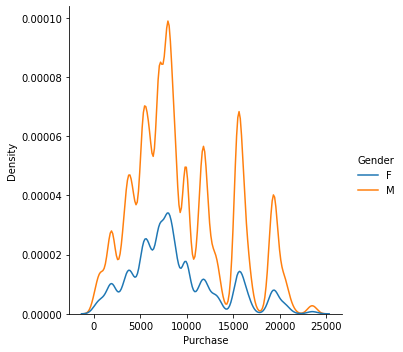

In [ ]:
sns.displot(walmart_data, x = 'Purchase',hue = 'Gender', kind = 'kde',bw_adjust=1.0)
#sns.displot(female_df, x = 'Purchase')


In [ ]:
# non overlapping

In [ ]:
# male Population mean should lie between CI (9422.01,9453.03) 
# female Population mean should lie between CI (8709.21,8759.91) 

In [ ]:
## Marital Status

In [ ]:
walmart_data['Marital_Status'].unique()

array([0, 1])

In [ ]:
male_df = walmart_data.loc[walmart_data['Marital_Status'] == 0,['Marital_Status','Purchase']] # unmarried

In [ ]:
female_df = walmart_data.loc[walmart_data['Marital_Status'] == 1,['Marital_Status','Purchase']] # married


In [ ]:
male_df_purchase_mean = np.mean(male_df['Purchase'])
print("unmarried mean : ",male_df_purchase_mean)

female_df_purchase_mean = np.mean(female_df['Purchase'])
print("married mean : ",female_df_purchase_mean)

low_CI = male_df_purchase_mean - (np.abs(norm.ppf(0.025)) * (male_df['Purchase'].std()/np.sqrt(male_df.shape[0])))
high_CI = male_df_purchase_mean + (np.abs(norm.ppf(0.975)) * (male_df['Purchase'].std()/np.sqrt(male_df.shape[0])))
print("unmarried CI : ",low_CI,high_CI)

low_CI = female_df_purchase_mean - (np.abs(norm.ppf(0.025)) * (female_df['Purchase'].std()/np.sqrt(female_df.shape[0])))
high_CI = female_df_purchase_mean + (np.abs(norm.ppf(0.975)) * (female_df['Purchase'].std()/np.sqrt(female_df.shape[0])))
print("married CI : ",low_CI,high_CI)


unmarried mean :  9265.907618921507
married mean :  9261.174574082374
unmarried CI :  9248.61641818668 9283.198819656332
married CI :  9240.460427057078 9281.888721107669


unmarried : 
9266.090400026 16.138000529063003
CI 95% :  9215.991737715267 9278.310242284733
CI 90% :  9221.001321160209 9273.300658839791
CI 99% :  9206.200791044928 9288.101188955072
CI 65% :  9232.293011112188 9262.008968887812


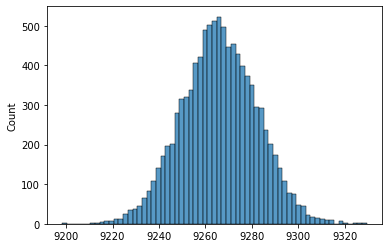

In [ ]:

#Sampling on data of male customers for size = 10000
print("unmarried : ")
samples_mean_ls = []
size = 100000
for reps in range(10000):
  samples = np.random.choice(male_df['Purchase'],size = size)
  sample_mean = np.mean(samples)
  samples_mean_ls.append(sample_mean)

sns.histplot(samples_mean_ls)

pop_mean = np.mean(samples_mean_ls)
pop_std = np.std(samples_mean_ls)
print(pop_mean,pop_std)

low_CI = samples_mean_ls[0] - (np.abs(norm.ppf(0.025)) * (male_df['Purchase'].std()/np.sqrt(size)))
high_CI = samples_mean_ls[0] + (np.abs(norm.ppf(0.975)) * (male_df['Purchase'].std()/np.sqrt(size)))

print("CI 95% : ",low_CI,high_CI)

low_CI = samples_mean_ls[0] - (np.abs(norm.ppf(0.05)) * (male_df['Purchase'].std()/np.sqrt(size)))
high_CI = samples_mean_ls[0] + (np.abs(norm.ppf(0.95)) * (male_df['Purchase'].std()/np.sqrt(size)))

print("CI 90% : ",low_CI,high_CI)

low_CI = samples_mean_ls[0] - (np.abs(norm.ppf(0.005)) * (male_df['Purchase'].std()/np.sqrt(size)))
high_CI = samples_mean_ls[0] + (np.abs(norm.ppf(0.995)) * (male_df['Purchase'].std()/np.sqrt(size)))

print("CI 99% : ",low_CI,high_CI)

low_CI = samples_mean_ls[0] - (np.abs(norm.ppf(0.175)) * (male_df['Purchase'].std()/np.sqrt(size)))
high_CI = samples_mean_ls[0] + (np.abs(norm.ppf(0.825)) * (male_df['Purchase'].std()/np.sqrt(size)))

print("CI 65% : ",low_CI,high_CI)

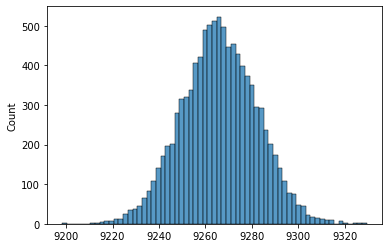

In [ ]:
sns.histplot(samples_mean_ls)

married : 
9261.163626412 15.63094631035424
CI 95% :  9236.955619276621 9299.14458072338
CI 90% :  9241.95478916804 9294.145410831961
CI 99% :  9227.185025305931 9308.91517469407
CI 65% :  9253.223006785642 9282.877193214359


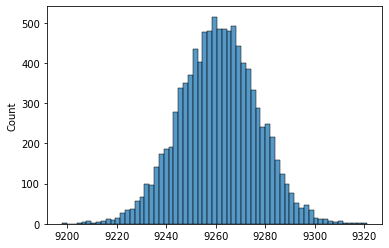

In [ ]:

#Sampling on data of male customers for size = 10000
print("married : ")
samples_mean_ls = []
size = 100000
for reps in range(10000):
  samples = np.random.choice(female_df['Purchase'],size = size)
  sample_mean = np.mean(samples)
  samples_mean_ls.append(sample_mean)

sns.histplot(samples_mean_ls)

pop_mean = np.mean(samples_mean_ls)
pop_std = np.std(samples_mean_ls)
print(pop_mean,pop_std)

low_CI = samples_mean_ls[0] - (np.abs(norm.ppf(0.025)) * (female_df['Purchase'].std()/np.sqrt(size)))
high_CI = samples_mean_ls[0] + (np.abs(norm.ppf(0.975)) * (female_df['Purchase'].std()/np.sqrt(size)))

print("CI 95% : ",low_CI,high_CI)

low_CI = samples_mean_ls[0] - (np.abs(norm.ppf(0.05)) * (female_df['Purchase'].std()/np.sqrt(size)))
high_CI = samples_mean_ls[0] + (np.abs(norm.ppf(0.95)) * (female_df['Purchase'].std()/np.sqrt(size)))

print("CI 90% : ",low_CI,high_CI)

low_CI = samples_mean_ls[0] - (np.abs(norm.ppf(0.005)) * (female_df['Purchase'].std()/np.sqrt(size)))
high_CI = samples_mean_ls[0] + (np.abs(norm.ppf(0.995)) * (female_df['Purchase'].std()/np.sqrt(size)))

print("CI 99% : ",low_CI,high_CI)

low_CI = samples_mean_ls[0] - (np.abs(norm.ppf(0.175)) * (female_df['Purchase'].std()/np.sqrt(size)))
high_CI = samples_mean_ls[0] + (np.abs(norm.ppf(0.825)) * (female_df['Purchase'].std()/np.sqrt(size)))

print("CI 65% : ",low_CI,high_CI)

In [ ]:
#overlapping CI

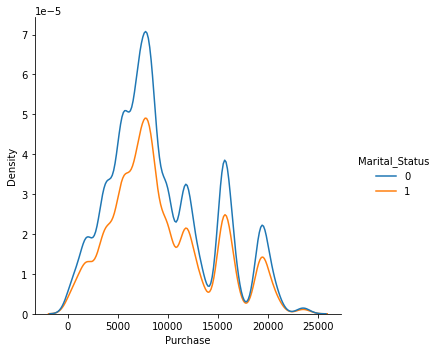

In [ ]:
sns.displot(walmart_data, x = 'Purchase',hue = 'Marital_Status',kind = 'kde',bw_adjust = 1.5)

In [ ]:
#Age
#loop


In [ ]:
walmart_data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [ ]:
walmart_data.loc[(walmart_data['Age'] != '0-17') & (walmart_data['Age'] != '55+') & (walmart_data['Age'] != '26-35') & (walmart_data['Age'] != '46-50') & (walmart_data['Age'] != '51-55') & (walmart_data['Age'] != '36-45') & (walmart_data['Age'] != '18-25'),['Age','Purchase']]

,Age,Purchase


In [ ]:
age_category = walmart_data['Age'].unique().tolist()

In [ ]:
age_category

['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']

0-17  mean :  8933.464640444974
0-17  CI :  8851.947970542686 9014.981310347262
0-17  : 
8934.7329105 50.17721869786286
CI 95% :  8715.473105489578 8915.825094510423
CI 90% :  8731.578755236698 8899.719444763303
CI 99% :  8683.995526665258 8947.302673334743
CI 65% :  8767.881175471506 8863.417024528495
55+  mean :  9336.280459449405
55+  CI :  9269.29883441773 9403.262084481079
55+  : 
9337.550756499999 49.07425538926083
CI 95% :  9224.269822598784 9420.716777401216
CI 90% :  9240.061559248861 9404.925040751139
CI 99% :  9193.405769115652 9451.580830884348
CI 65% :  9275.6564137943 9369.3301862057
26-35  mean :  9252.690632869888
26-35  CI :  9231.733676400028 9273.647589339747
26-35  : 
9252.0577309 52.61338713397146
CI 95% :  9227.979869425597 9424.388930574403
CI 90% :  9243.768559927163 9408.600240072838
CI 99% :  9197.121769466932 9455.247030533068
CI 65% :  9279.35654839982 9373.01225160018
46-50  mean :  9208.625697468327
46-50  CI :  9163.085142648752 9254.166252287903
46-50  :

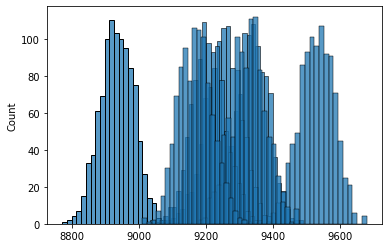

In [ ]:
for age in age_category:
  age_category_df = pd.DataFrame(walmart_data.loc[walmart_data['Age'] == age,['Age','Purchase']])
  age_category_df.reset_index(inplace = True,drop = True)
  #print(age_category_df.head())
  #print(age_category_df.shape)
  age_category_df_purchase_mean = np.mean(age_category_df['Purchase'])
  print(age, " mean : ",age_category_df_purchase_mean)
  
  low_CI = age_category_df_purchase_mean - (np.abs(norm.ppf(0.025)) * (age_category_df['Purchase'].std()/np.sqrt(age_category_df.shape[0])))
  high_CI = age_category_df_purchase_mean + (np.abs(norm.ppf(0.975)) * (age_category_df['Purchase'].std()/np.sqrt(age_category_df.shape[0])))
  print(age," CI : ",low_CI,high_CI)

    
  #Sampling on data of male customers for size = 10000
  print(age, " : ")
  samples_mean_ls = []
  size = 10000
  for reps in range(1000):
    samples = np.random.choice(age_category_df['Purchase'],size = size)
    sample_mean = np.mean(samples)
    samples_mean_ls.append(sample_mean)

  sns.histplot(samples_mean_ls)

  pop_mean = np.mean(samples_mean_ls)
  pop_std = np.std(samples_mean_ls)
  print(pop_mean,pop_std)

  low_CI = samples_mean_ls[0] - (np.abs(norm.ppf(0.025)) * (age_category_df['Purchase'].std()/np.sqrt(size)))
  high_CI = samples_mean_ls[0] + (np.abs(norm.ppf(0.975)) * (age_category_df['Purchase'].std()/np.sqrt(size)))

  print("CI 95% : ",low_CI,high_CI)

  low_CI = samples_mean_ls[0] - (np.abs(norm.ppf(0.05)) * (age_category_df['Purchase'].std()/np.sqrt(size)))
  high_CI = samples_mean_ls[0] + (np.abs(norm.ppf(0.95)) * (age_category_df['Purchase'].std()/np.sqrt(size)))

  print("CI 90% : ",low_CI,high_CI)

  low_CI = samples_mean_ls[0] - (np.abs(norm.ppf(0.005)) * (age_category_df['Purchase'].std()/np.sqrt(size)))
  high_CI = samples_mean_ls[0] + (np.abs(norm.ppf(0.995)) * (age_category_df['Purchase'].std()/np.sqrt(size)))

  print("CI 99% : ",low_CI,high_CI)

  low_CI = samples_mean_ls[0] - (np.abs(norm.ppf(0.175)) * (age_category_df['Purchase'].std()/np.sqrt(size)))
  high_CI = samples_mean_ls[0] + (np.abs(norm.ppf(0.825)) * (age_category_df['Purchase'].std()/np.sqrt(size)))

  print("CI 65% : ",low_CI,high_CI)


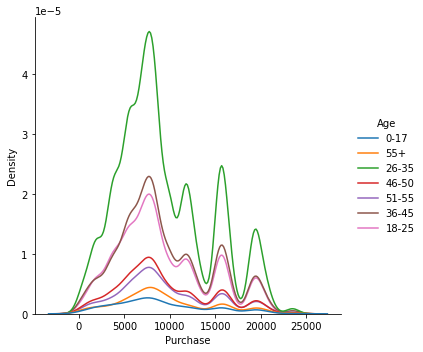

In [ ]:
sns.displot(walmart_data, x = 'Purchase',hue = 'Age',kind = 'kde', bw_adjust = 1.5)